# Comprehensive Assessment : Machine Learning

## **Objectives**
The objectives of this project are to identify the key factors that influence car prices, build and evaluate various regression models to predict these prices, and assess their performance using metrics like R-squared, MSE, and MAE. Additionally, the project aims to analyze feature importance to understand which variables are most impactful and to optimize the best-performing model through hyperparameter tuning for enhanced accuracy.


## 1. Loading and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
import os
print(os.getcwd())


C:\Users\user


In [9]:
df = pd.read_csv(r'C:\Users\user\Downloads\CarPrice_Assignment.csv')


In [10]:
df.head() 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.tail()   

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
df.describe().T   

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [14]:
df.shape         

(205, 26)

In [15]:
df.size          

5330

In [16]:
df.columns      

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
df.duplicated().sum() 

0

In [18]:
df.isnull().sum()     

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [19]:
df.describe(include="object").T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [21]:
# Numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [22]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols )

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


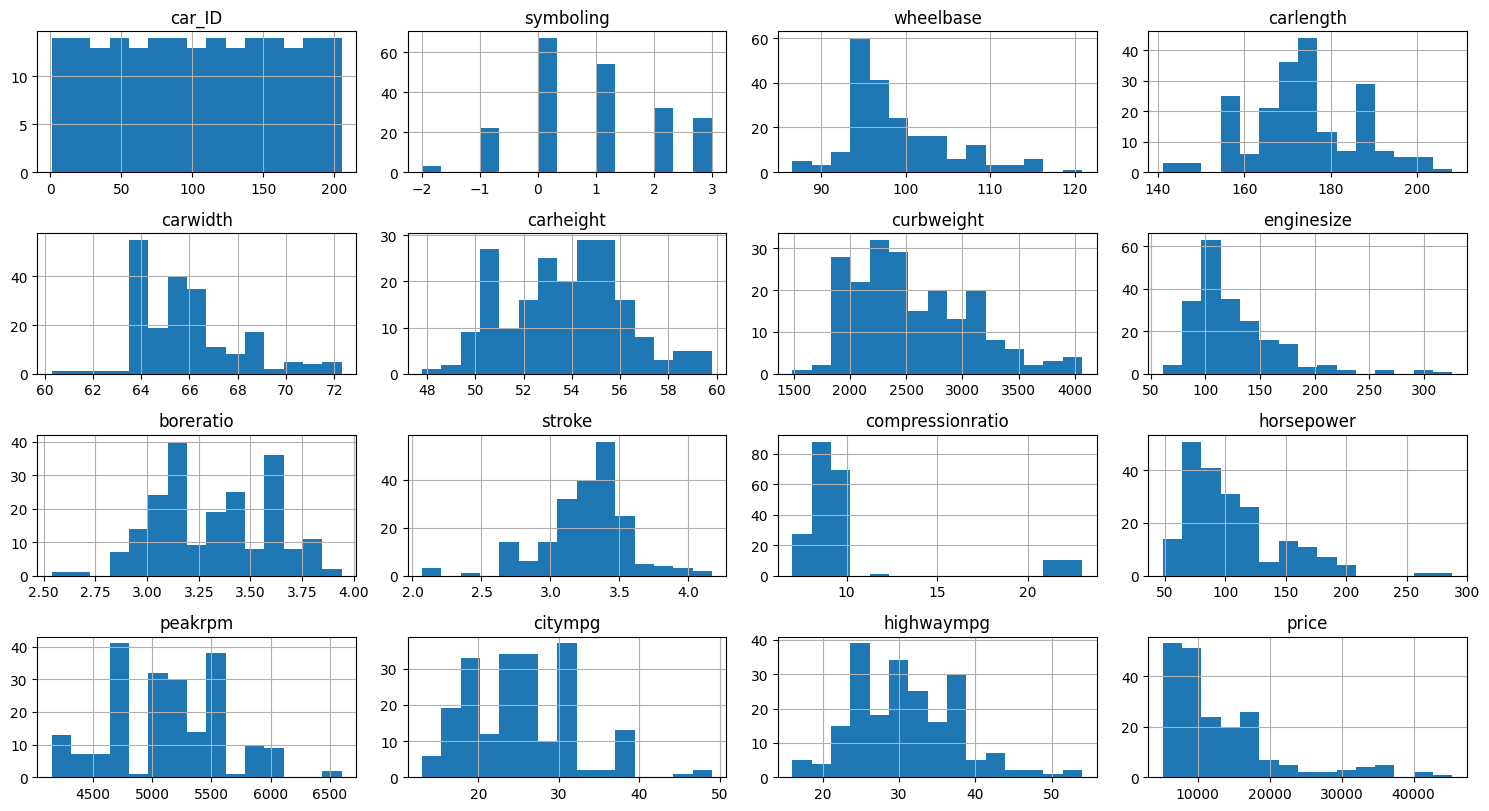

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for numerical columns
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

In [29]:
# Convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
# Split the data into features (X) and target (y)

X = df.drop('price', axis=1)              # Replace 'price' with the actual column name
y = df['price']

In [35]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Model Implementation 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [38]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

## 3. Model Evaluation

In [39]:
# Train and test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store results
    results[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

In [40]:
# Display the evaluation results
results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE,MAE
Linear Regression,0.844116,1.230612e+07,2087.306212
Decision Tree Regressor,0.883634,9.186435e+06,2085.747976
Random Forest Regressor,0.958426,3.282055e+06,1268.733244
Gradient Boosting Regressor,0.930503,5.486371e+06,1631.953918
Support Vector Regressor,-0.100146,8.684995e+07,5696.573042


In [41]:
# Identify the best performing model
best_model_name = results_df['R2 Score'].idxmax()
print(f"The best performing model is: {best_model_name}")

The best performing model is: Random Forest Regressor


Random Forest Regressor is the best best performing model compared to other models.best R2 score and least mean absalute error

## 4. Feature Importance Analysis 

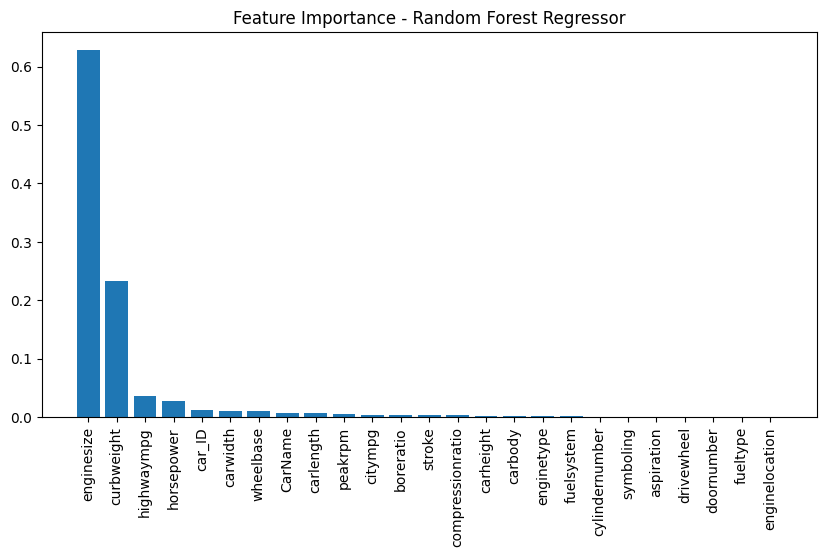

In [42]:
# For tree-based models like RandomForest, GradientBoosting, and DecisionTree
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Feature Importance - {best_model_name}")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()

# For linear models like LinearRegression
elif hasattr(best_model, 'coef_'):
    coef = best_model.coef_
    indices = np.argsort(np.abs(coef))[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Coefficients - {best_model_name}")
    plt.bar(range(X.shape[1]), coef[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()


The analysis from the Random Forest Regressor highlights the significant impact of engine size and curb weight on car prices. This information can help management prioritize these factors when developing or pricing new cars. Features with minimal importance may not require as much focus for cost efficiency or promotional strategies.








## 5. Hyperparameter Tuning 

In [44]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for RandomForestRegressor
if best_model_name == 'Random Forest Regressor':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print(f"R2 Score after tuning: {r2_score(y_test, y_pred)}")
    print(f"MSE after tuning: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE after tuning: {mean_absolute_error(y_test, y_pred)}")

Best parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score after tuning: 0.9583786893131443
MSE after tuning: 3285753.6199018583
MAE after tuning: 1264.5336910569104
